# Reference Implementation

## End to End workflow

The following image describes the project end to end workflow:

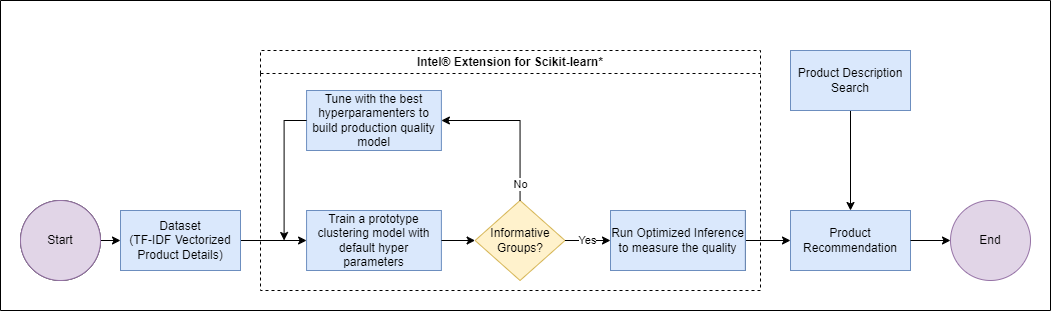

## Prerequisites

1. Follow the instructions in the "Set Up Conda" section of the README before continuing.
2. Conda `product_recommendation_intel` environment should have been already created. Follow instructions in "Set Up Environment" and "Run Using Jupyter Notebook" sections of the README before continuing.
3. `kaggle.json` file derived from Kaggle* api website should be inside `.kaggle` folder. Follow the instructions in the "Download the outputsets" section of the README before continuing.
---

## Set Up Environment

Use the following cell to see your active kernel list. There should be a kernel path that contains the following subpath: `/miniconda3/envs/product_recommendation_intel/share/jupyter/kernels/python3`.
If that kernel is not activated, navigate to Kernel > Change kernel > Python [conda env:product_recommendation_intel]

In [ ]:
!jupyter kernelspec list


---

## Script Highligts

The script `run_benchmarks.py` takes the following arguments:

```bash
usage: src/run_benchmarks.py [-d DATASET][-l LOGFILE][-t TUNNING][-mp MODELPATH]

optional arguments:
  -h, --help            show this help message and exit
  -d DATASETSIZE, --dataset DATASETSIZE
                        Size of the dataset
  -l LOGFILE, --logfile LOGFILE
                        Log file to output benchmarking results to
  -t TUNNING, --tunning TUNING
                        Hyper parameter tuning (0/1)
  -mp MODELPATH --modelpath MODELPATH
                        Model path for inference


## Workflow Steps

### 1. Setting up Variables

In [ ]:
import os

os.environ["WORKSPACE"] = os.getcwd()
os.environ["OUTPUT_DIR"] = os.environ["WORKSPACE"] + "/output"

!echo "WORKSPACE= $WORKSPACE"
!echo "OUTPUT_DIR= $OUTPUT_DIR"

### 2. Setting up Data

In [ ]:
%%bash
mkdir -p $OUTPUT_DIR && cd $OUTPUT_DIR
kaggle datasets download -d PromptCloudHQ/flipkart-products 
unzip flipkart-products.zip -d flipkart-products-ecommerce

### 3. Setting up Saved Models

In [ ]:
%%bash
mkdir -p $OUTPUT_DIR/saved_models
ls $OUTPUT_DIR

### 4. Train and save 'k-means' models

In [ ]:
%%bash
python $WORKSPACE/src/run_benchmarks.py -d 1000  

### 5. Run the batch and real time inference with stock

In [ ]:
%%bash
python $WORKSPACE/src/run_benchmarks.py -d 1000 -mp $OUTPUT_DIR/saved_models/prod_rec.joblib

### 6. Run Hyperparameter tuning with intel python and stock technologies

In [ ]:
%%bash
python $WORKSPACE/src/run_benchmarks.py -d 1000 -t 1

### 7. Clean Up Data

In [ ]:
%%bash
rm -rf $OUTPUT_DIR